In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
gdp_df=pd.read_csv('../data/gdp_per_capita.csv')

Take a look at the first 10 rows.

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


Take a look at the first 5 rows. Do you see a problem?

In [4]:
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [5]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


5. Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [6]:
gdp_df=pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python') 

In [7]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [8]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [9]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [10]:
gdp_df=gdp_df.rename (columns={'Country or Area': 'Country','Value': 'GDP_Per_Capita'})

In [11]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [12]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [13]:
gdp_df['Year'].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [14]:
gdp_df['Country'].value_counts()

Guyana                       30
Lao PDR                      30
South Asia                   30
Kiribati                     30
Comoros                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [15]:
gdp_df['Country'].value_counts().sum() #number of countries 

6868

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [16]:
[gdp_df['Year']== 2014]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 6863    False
 6864    False
 6865    False
 6866    False
 6867    False
 Name: Year, Length: 6868, dtype: bool]

In [17]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [18]:
gdp_2014= gdp_df[gdp_df['Year'].isin([2014])]

In [19]:
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


11.Use .describe() to find the summary statistics for GDP per capita in 2014.

In [20]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:>

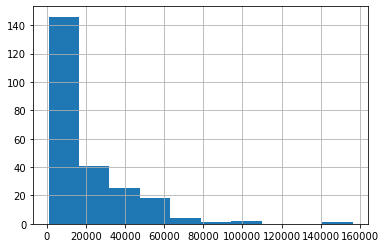

In [21]:
gdp_2014.GDP_Per_Capita.hist(bins=10)

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [22]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [23]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [24]:
gdp_df[gdp_df['Year'].isin([1990, 2017])]

,Country,Year,GDP_Per_Capita
2,Afghanistan,2017,2058.383832
20,Albania,2017,12811.759436
47,Albania,1990,4842.734635
50,Algeria,2017,11737.409353
77,Algeria,1990,8746.352901
...,...,...,...
6807,World,1990,9680.269697
6810,Zambia,2017,3485.005238
6837,Zambia,1990,2190.182814
6840,Zimbabwe,2017,3028.245976


In [25]:
gdp_pivoted= pd.pivot_table(gdp_df[gdp_df['Year'].isin([1990, 2017])], 
                            values=['GDP_Per_Capita'], 
                            index=['Country'], 
                            columns=['Year'], dropna=True).dropna(0)

In [26]:
gdp_pivoted

GDP_Per_Capita              
Year                          1990          2017
Country                                         
Albania                4842.734635  12811.759436
Algeria                8746.352901  11737.409353
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551675  19840.076123
Arab World             9694.667544  14555.474921
...                            ...           ...
Vanuatu                2888.309393   3116.645194
Vietnam                1673.249634   7155.745829
World                  9680.269697  16253.385518
Zambia                 2190.182814   3485.005238
Zimbabwe               3324.348171   3028.245976

[207 rows x 2 columns]

15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [34]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 2017) | (gdp_df['Year'] == 1990)].pivot_table('GDP_Per_Capita', index='Country', columns='Year').dropna(0)

In [35]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [36]:
gdp_pivoted['Percent Change'] = (gdp_pivoted.loc[:,2017] - gdp_pivoted.loc[:,1990]) / gdp_pivoted.loc[:,1990]

In [38]:
gdp_pivoted

Year,1990,2017,Percent Change
Country,,,
Albania,4842.734635,12811.759436,1.645563
Algeria,8746.352901,11737.409353,0.341978
Angola,5783.429064,7310.901738,0.264112
Antigua and Barbuda,15459.551675,19840.076123,0.283354
Arab World,9694.667544,14555.474921,0.501390
...,...,...,...
Vanuatu,2888.309393,3116.645194,0.079055
Vietnam,1673.249634,7155.745829,3.276556
World,9680.269697,16253.385518,0.679022


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [40]:
gdp_pivoted['Percent Change'].nsmallest()

Country
Dem. Rep. Congo            -0.417598
United Arab Emirates       -0.397210
Burundi                    -0.347110
Ukraine                    -0.246360
Central African Republic   -0.240393
Name: Percent Change, dtype: float64

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [41]:
gdp_pivoted['Percent Change'].nlargest()

Country
Equatorial Guinea                              20.684046
China                                           9.074063
Myanmar                                         6.649394
East Asia & Pacific (excluding high income)     4.975603
East Asia & Pacific (IDA & IBRD)                4.973349
Name: Percent Change, dtype: float64

In [53]:
gdp_pivoted.columns

Index([1990, 2017, 'Percent Change'], dtype='object', name='Year')

In [98]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea']

,Country,Year,GDP_Per_Capita
1754,Equatorial Guinea,2019,18558.003852
1755,Equatorial Guinea,2018,20359.845144
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956


In [105]:
gdp_df[gdp_df['Year'] == 1990]

,Country,Year,GDP_Per_Capita
47,Albania,1990,4842.734635
77,Algeria,1990,8746.352901
107,Angola,1990,5783.429064
137,Antigua and Barbuda,1990,15459.551675
167,Arab World,1990,9694.667544
...,...,...,...
6721,Vanuatu,1990,2888.309393
6751,Vietnam,1990,1673.249634
6807,World,1990,9680.269697
6837,Zambia,1990,2190.182814


In [108]:
 gdp_df[(gdp_df['Year'] == 2017) | (gdp_df['Year'] == 1990)]

,Country,Year,GDP_Per_Capita
2,Afghanistan,2017,2058.383832
20,Albania,2017,12811.759436
47,Albania,1990,4842.734635
50,Algeria,2017,11737.409353
77,Algeria,1990,8746.352901
...,...,...,...
6807,World,1990,9680.269697
6810,Zambia,2017,3485.005238
6837,Zambia,1990,2190.182814
6840,Zimbabwe,2017,3028.245976


In [107]:
gdp_pivoted.columns

Index(['Country'], dtype='object')

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [ ]:
continents= pd.read_csv('../data/continents.csv')

In [ ]:
continents.head()

19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

20. Determine the number of countries per continent. Create a bar chart showing this.

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [113]:
 internet_df = pd.read_csv('../data/internet_use.csv', header=0, usecols=[0,1,2], names=['Country', 'Year', 'Internet_Users_Pct'])

In [114]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545
3,Afghanistan,2011,5
4,Afghanistan,2010,4


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.



24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.